In [1]:
using BSON: @save, @load
using Statistics
using DelimitedFiles
using Printf
using MDToolbox
using StatsBase 
using LinearAlgebra
using Random
using Plots

include("../src/afm.jl")

baumwelch (generic function with 1 method)

In [2]:
nq = 576
test_radius = 25
pred_radii = [15, 18, 20, 25, 30, 32, 35]
sigma_noise = 3
sharpness = 10
nframe = 100

plts = []
x_min = 0
x_max = 70
bin_length = 30
font_size = 10
width = (x_max - x_min) / bin_length

for pred_radius in pred_radii
    @load "data/viterbi/test_radius_$(test_radius)/pred_radius_$(pred_radius)/sharpness_$(sharpness)/q_$(nq)/rmsds_origin.bson" rmsds_arr
    histogram(reshape(rmsds_arr, nframe * nq, 1), bins=range(x_min, stop = x_max, length = bin_length), bar_width = width, tickfontsize = font_size, label = "individual", legend = false)
    @load "data/viterbi/test_radius_$(test_radius)/pred_radius_$(pred_radius)/sharpness_$(sharpness)/q_$(nq)/rmsds_MD.bson" rmsds_arr
    p = histogram!(reshape(rmsds_arr, nframe * nq, 1), bins=range(x_min, stop = x_max, length = bin_length), bar_width = 0.65 * width, tickfontsize = font_size, label = "trajectory with T", legend = false)
    @load "data/viterbi/test_radius_$(test_radius)/pred_radius_$(pred_radius)/sharpness_$(sharpness)/q_$(nq)/rmsds_rand_no_rotate.bson" rmsds_arr
    p = histogram!(reshape(rmsds_arr, nframe * nq, 1), bins=range(x_min, stop = x_max, length = bin_length), bar_width = 0.40 * width, tickfontsize = font_size, label = "trajectory with T", legend = false)
    push!(plts, p)
    
end

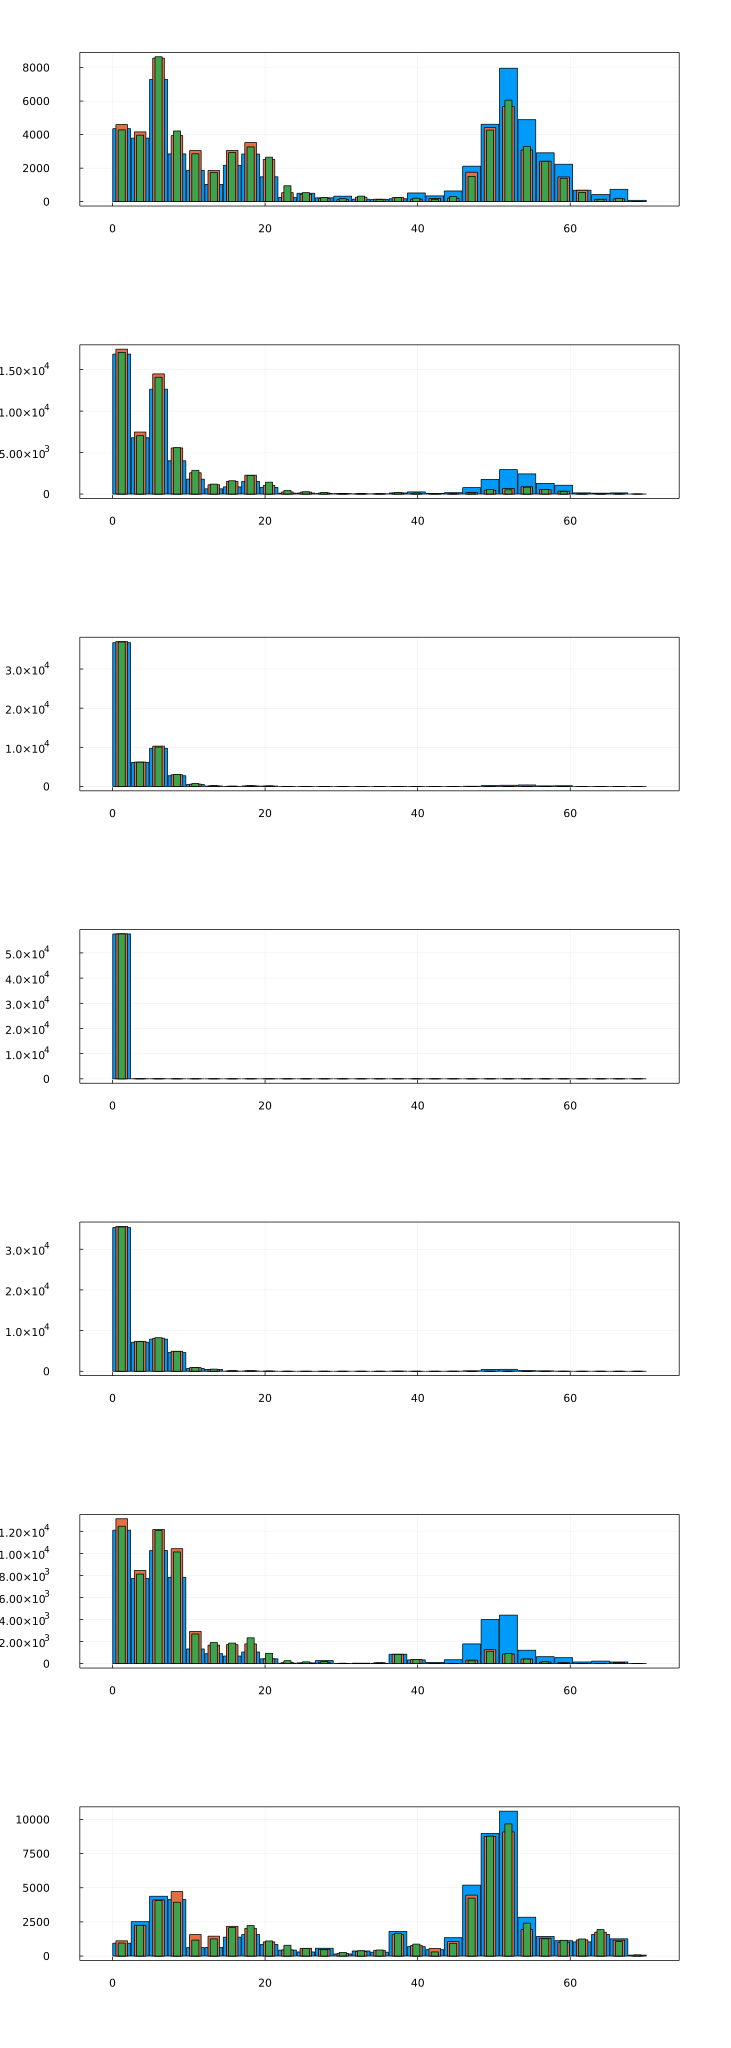

In [3]:
plot(plts..., layout=(size(pred_radii, 1),1),size=(1000,size(pred_radii, 1) * 400), margin=16Plots.mm, framestyle=:box)
# savefig("data/rmse_individual_original.png")

In [4]:
using DataFrames

nq = 576
test_radius = 25
pred_radii = [18, 20, 25, 30, 32]
pred_radii_str = ["1.8", "2.0", "2.5", "3.0", "3.2"]
sigma_noise = 3
sharpness = 10
nframe = 100

plts = []
x_min = 0
x_max = 70
bin_length = 30
font_size = 10
width = (x_max - x_min) / bin_length

seed = MersenneTwister(334)
extracted_qs = sample(seed, 1:576, 50, replace=false)

@load "data/viterbi/test_radius_$(test_radius)/pred_radius_$(pred_radii[1])/sharpness_$(sharpness)/q_$(nq)/rmsds_origin.bson" rmsds_arr
@show size(rmsds_arr)
x1 = DataFrame(pred_radii_str[1] => rmsds_arr[:])
@load "data/viterbi/test_radius_$(test_radius)/pred_radius_$(pred_radii[1])/sharpness_$(sharpness)/q_$(nq)/rmsds_MD.bson" rmsds_arr
x2 = DataFrame(pred_radii_str[1] => rmsds_arr[:])
@load "data/viterbi/test_radius_$(test_radius)/pred_radius_$(pred_radii[1])/sharpness_$(sharpness)/q_$(nq)/rmsds_rand.bson" rmsds_arr
x3 = DataFrame(pred_radii_str[1] => rmsds_arr[:])
R = [x1, x2, x3]

#for i = 2:length(pred_radii)
#DataFrame
#end

size(rmsds_arr) = (576, 100)


3-element Vector{DataFrame}:
 57600×1 DataFrame
   Row │ 1.8      
       │ Float64  
───────┼──────────
     1 │  0.0
     2 │ 40.0823
     3 │  0.0
     4 │  9.06837
     5 │  0.0
     6 │  0.0
     7 │  0.0
     8 │  0.0
     9 │  0.0
    10 │  5.79801
    11 │  4.01555
   ⋮   │    ⋮
 57591 │ 55.5251
 57592 │  0.0
 57593 │ 46.6755
 57594 │  0.0
 57595 │  0.0
 57596 │ 53.6876
 57597 │  0.0
 57598 │  0.0
 57599 │ 46.926
 57600 │  4.1159
57579 rows omitted
 57600×1 DataFrame
   Row │ 1.8      
       │ Float64  
───────┼──────────
     1 │  0.0
     2 │  0.0
     3 │  0.0
     4 │  9.06837
     5 │  0.0
     6 │  0.0
     7 │  0.0
     8 │  0.0
     9 │  0.0
    10 │  5.79801
    11 │  4.01555
   ⋮   │    ⋮
 57591 │  5.70096
 57592 │  0.0
 57593 │  0.0
 57594 │  0.0
 57595 │  0.0
 57596 │  0.0
 57597 │  0.0
 57598 │  0.0
 57599 │  0.0
 57600 │  4.1159
57579 rows omitted
 57600×1 DataFrame
   Row │ 1.8      
       │ Float64  
───────┼──────────
     1 │  0.0
     2 │ 40.0823
     3 │  

In [5]:
DataFrame(x = [1,2,3], y = 4:6, z = "sentosa")

,x,y,z
,Int64,Int64,String
1,1,4,sentosa
2,2,5,sentosa
3,3,6,sentosa


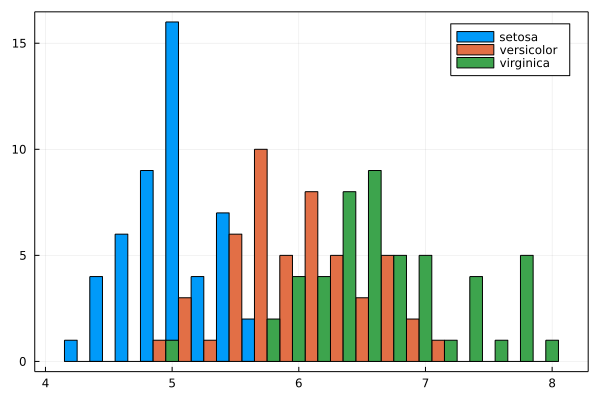

In [26]:
using DataFrames
using RDatasets
using StatsPlots

iris = dataset("datasets", "iris")
@df iris groupedhist(:SepalLength, group=:Species, bar_position=:identity, bar_width=0.3, bins=20, framestyle=:box)

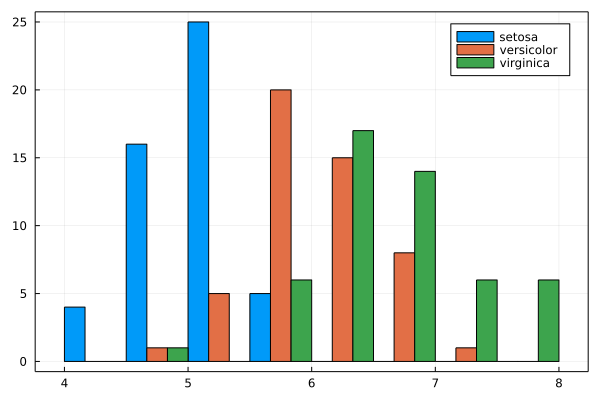

In [17]:
groupedbar(rand(10,3), bar_position = :dodge, bar_width=0.)